# Toy Example for Asymmetric SPNI

In [1]:
# Add the parent directory to the path
import sys, os
sys.path.insert(0, os.path.abspath("../.."))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from solvers.spnia_asym import AsymmetricSPNI
from models.ShortestPathGrb import shortestPathGrb
from models.ShortestPathGrid import ShortestPathGrid
from solvers.BendersDecomposition import BendersDecomposition

### Create true and estimated network

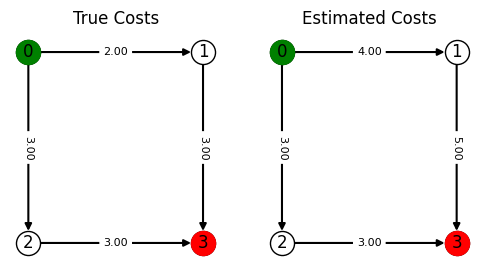

In [3]:
# Plot the graphs next to each other
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

# Define the graph with the true costs
c_true = np.array([2,3,3,3])
grid_true = ShortestPathGrid(m=2, n=2, cost=c_true)
grid_true.visualize(ax=ax[0], title="True Costs")

# Define the graph with the estimated costs
c_est = np.array([4,3,5,3])
grid_est = ShortestPathGrid(m=2, n=2, cost=c_est)
grid_est.visualize(ax=ax[1], title="Estimated Costs")

In [4]:
# Define the true and estimated delays, and the interdiction budget
d_true = np.array([3,1,4,2])
d_est = np.array([3,1,4,2])
budget = 1

### Interdictor assuming complete evader information

In [5]:
# Solve the Shortest Path Network Interdiction problem, 
# where the interdictor assumes the evader has full information
shortest_path_true = shortestPathGrb(grid_true)
benders_true = BendersDecomposition(shortest_path_true, budget, d_true)
x_star_I, y_star_I, obj_star_I = benders_true.solve()

Restricted license - for non-production use only - expires 2026-11-23
Bender's decomposition running:
-------------------------------
Iteration 1: z_max = 9.0, z_min = 5.0
Iteration 2: z_max = 6.0, z_min = 6.0
-------------------------------
Found epsilon-optimal solution after 2 iterations with epsilon = 0.00


In [6]:
# Solve the true shortest path problem with the interdictions
shortest_path_true_I = shortestPathGrb(grid_true)
shortest_path_true_I.setObj(shortest_path_true_I.cost + d_true * x_star_I)
y_true_I, obj_true_I = shortest_path_true_I.solve()

# Solve the estimated shortest path problem with the interdictions
shortest_path_est_I = shortestPathGrb(grid_est)
shortest_path_est_I.setObj(shortest_path_est_I.cost + d_est * x_star_I)
y_est_I, obj_est_I = shortest_path_est_I.solve()

------ True Shortest Path -----------
Shortest Path: 	[0.0, 1.0, 0.0, 1.0]
Objective: 	6.0

------ Estimated Shortest Path ------
Shortest Path: 	[0.0, 1.0, 0.0, 1.0]
Objective: 	6.0


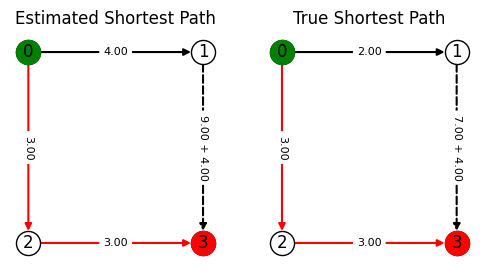

In [7]:
# Print objectives
print("------ True Shortest Path -----------\n" + 
      f"Shortest Path: \t{y_true_I}\n" + 
      f"Objective: \t{grid_true(y_true_I, interdictions=x_star_I * d_true)}\n")
print("------ Estimated Shortest Path ------\n" + 
      f"Shortest Path: \t{y_est_I}\n" + 
      f"Objective: \t{grid_true(y_est_I, interdictions=x_star_I * d_true)}")

# Visualize graphs with interdictions and shortest paths
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
shortest_path_est_I._graph.visualize(colored_edges=y_est_I, dashed_edges=x_star_I, ax=ax[0], title="Estimated Shortest Path", interdictions=x_star_I * d_est)
shortest_path_true_I._graph.visualize(colored_edges=y_true_I, dashed_edges=x_star_I, ax=ax[1], title="True Shortest Path", interdictions=x_star_I * d_true)

### Interdictor knowing asymmetric evader information

In [8]:
# Solve the Asymmetric Shortest Path Network Interdiction problem
asym_spni = AsymmetricSPNI(grid_true, budget, c_true, d_true, c_est, d_est)
x_star_II, z_star_II = asym_spni.solve()

In [9]:
# Solve the true shortest path problem with the interdictions
shortest_path_true_II = shortestPathGrb(grid_true)
shortest_path_true_II.setObj(shortest_path_true_II.cost + d_true * x_star_II)
y_true_II, obj_true_II = shortest_path_true_II.solve()

# Solve the estimated shortest path problem with the interdictions
shortest_path_est_II = shortestPathGrb(grid_est)
shortest_path_est_II.setObj(shortest_path_est_II.cost + d_est * x_star_I)
y_est_II, obj_est_II = shortest_path_est_II.solve()

------ True Shortest Path -----------
Shortest Path: 	[1.0, 0.0, 1.0, 0.0]
Objective: 	5.0

------ Estimated Shortest Path ------
Shortest Path: 	[0.0, 1.0, 0.0, 1.0]
Objective: 	8.0


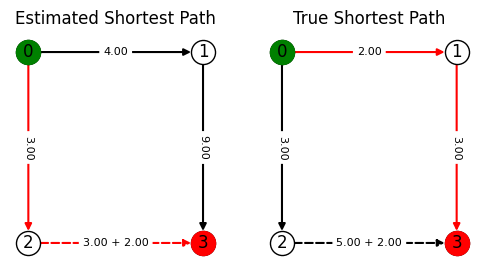

In [10]:
# Print objectives
print("------ True Shortest Path -----------\n" + 
      f"Shortest Path: \t{y_true_II}\n" + 
      f"Objective: \t{grid_true(y_true_II, interdictions=x_star_II * d_true)}\n")
print("------ Estimated Shortest Path ------\n" + 
      f"Shortest Path: \t{y_est_II}\n" + 
      f"Objective: \t{grid_true(y_est_II, interdictions=x_star_II * d_true)}")

# Visualize graphs with interdictions and shortest paths
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
shortest_path_est_II._graph.visualize(colored_edges=y_est_II, dashed_edges=x_star_II, ax=ax[0], title="Estimated Shortest Path", interdictions=x_star_II * d_est)
shortest_path_true_II._graph.visualize(colored_edges=y_true_II, dashed_edges=x_star_II, ax=ax[1], title="True Shortest Path", interdictions=x_star_II * d_true)